# Project1
Новак Евгений <br>
Орлов Григорий <br>
Тожимухаммедов Асадбек <br>
Вариант: 1

----

### Условие: <br>
* Реализовать метод парабол, метод золотого сечения. <br>
* Тестовые функции:
$$
	\begin{align*}
    1. & \quad f(x) = x^2, & x \in [-1; 10]; \\
    2. & \quad f(x) = x^{10}, & x \in [-1; 1]; \\
    3. & \quad f(x) = x\exp{x}, & x \in [-2; 0]; \\
    4. & \quad f(x) = -x\exp{-x}, & x \in [-2; 6]; \\
    5. & \quad f(x) = \frac{x^4}{\ln{x}}, & x \in [1.1; 1.5]; \\
    6. & \quad f(x) = \frac{x^3}{3} - x\ln{x} - 2\sin{x}, & x \in [0.1; 2];
	\end{align*}
$$

* Что требуется
1. Практически расчитать скорость сходимости методов для точности в пределах от $ 10^{−6} $ до $ 10^{−5} $ с шагом $ 10^{−7} $. Построить графики зависимост (1) времени расчета от точности, (2) числа итераций от точности, (3) количество вызовов функции за все время расчета от точности.
2. Для точности $ 5 · 10^{−6} $ построить график сходимости методов: точка от номера итерации.
3. Для точности $ 5·10^{−6} $ построить график числа вызовов функции: число вызовов от номера итерации.
Рассматривать точность по точке, а не по функции

### Решение:

In [28]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import time
import copy
from typing import Callable

In [29]:
def golden_section_search(f: Callable[[float], float], a: float, b: float, eps: float) -> tuple[float, list, list, int]:
    phi = (1 + np.sqrt(5)) / 2
    x1 = a + (b - a) / (phi + 1)
    x2 = b - (b - a) / (phi + 1)
    f1, f2 = f(x1), f(x2)

    iter_num, lst_x, lst_y = 0, [], []
    lst_x.append(0)
    lst_y.append((a+b)/2)

    while abs(b - a) > eps:
        iter_num += 1
        if f1 < f2:
            b = x2
            x2, f2 = x1, f1
            x1 = a + (b - a) / (phi + 1)
            f1 = f(x1)
        else:
            a = x1
            x1, f1 = x2, f2
            x2 = b - (b - a) / (phi + 1)
            f2 = f(x2)
        
        lst_x.append(iter_num)
        lst_y.append((a+b)/2)
    return ((a + b) / 2, copy.deepcopy(lst_x), copy.deepcopy(lst_y), iter_num)

def parabolas_search(f: Callable[[float], float], a: float, b: float, eps: float) -> tuple[float, list, list, int]:
    x1, x2, x3 = a, (a + b) / 2, b
    f1, f2, f3 = f(x1), f(x2), f(x3)
    iter_num, lst_x, lst_y = 0, [], []
    lst_x.append(0)
    lst_y.append(x2)
    delta = 1000.0

    while abs(delta) > eps:
        iter_num += 1
        u = x2 - (((x2 - x1)**2) * (f2 - f3) - ((x2 - x3)**2) * (f2 - f1)) / (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)))
        fu = f(u)
        if (fu > f2) and (u > x2):
            x1, x2, x3 = x1, x2, u
        elif (fu > f2) and (u < x2):
            x1, x2, x3 = u, x2, x3
        elif (fu < f2) and (u > x2):
            delta = abs(x2-u)
            x1, x2, x3 = x2, u, x3
        elif (fu < f2) and (u < x2):
            delta = abs(x2-u)
            x1, x2, x3 = x1, u, x2
        else: 
            lst_x.append(iter_num)
            lst_y.append(x2)
            return (x2, copy.deepcopy(lst_x), copy.deepcopy(lst_y), iter_num)
            
        f1 = f(x1)
        f2 = f(x2)
        f3 = f(x3)
        lst_x.append(iter_num)
        lst_y.append(x2)
    return (x2, copy.deepcopy(lst_x), copy.deepcopy(lst_y), iter_num)


accuracy = 5 * 10**(-6)
number_of_func = 6
function_list = [lambda x: x ** 2, lambda x: x ** 10, lambda x: x * np.exp(x),
             lambda x: -x * np.exp(-x), lambda x: x ** 4 /np.log(x),
             lambda x: x ** 3 - x * np.log(x) - 2 * np.sin(x)]
name_list = [r'$ x^2 $', r'$ x^{10} $', r'$ x e^x $', r'$ -x e^{-x} $', r'$ x^{4}/lnx $', r'$ x^{3} - xlnx - 2sinx $']
interval_list = [[-1, 10], [-1, 1], [-2, 0], [-2, 6], [1.1, 1.5], [0.1, 2]]


print("Запуск на тестовых функциях для метода золотого сечения:")
for i in range(number_of_func):
    ans = golden_section_search(function_list[i], interval_list[i][0], interval_list[i][1], accuracy)
    print(f"{i + 1}:", ans[0])


print("Запуск на тестовых функциях для метода парабол:")
for i in range(number_of_func):
    ans = parabolas_search(function_list[i], interval_list[i][0], interval_list[i][1], accuracy)
    print(f"{i + 1}:", ans[0])


Запуск на тестовых функциях для метода золотого сечения:
1: -1.061870609387482e-07
2: -4.834440546453919e-18
3: -1.0
4: 1.0000010450276808
5: 1.2840257751681103
6: 0.8481435660278989
Запуск на тестовых функциях для метода парабол:
1: 0.0
2: 0.0
3: -1.0
4: 1.0000607840557467
5: 1.2840361986465458
6: 0.8481441579183262


* Построим графики времени работы от точности.

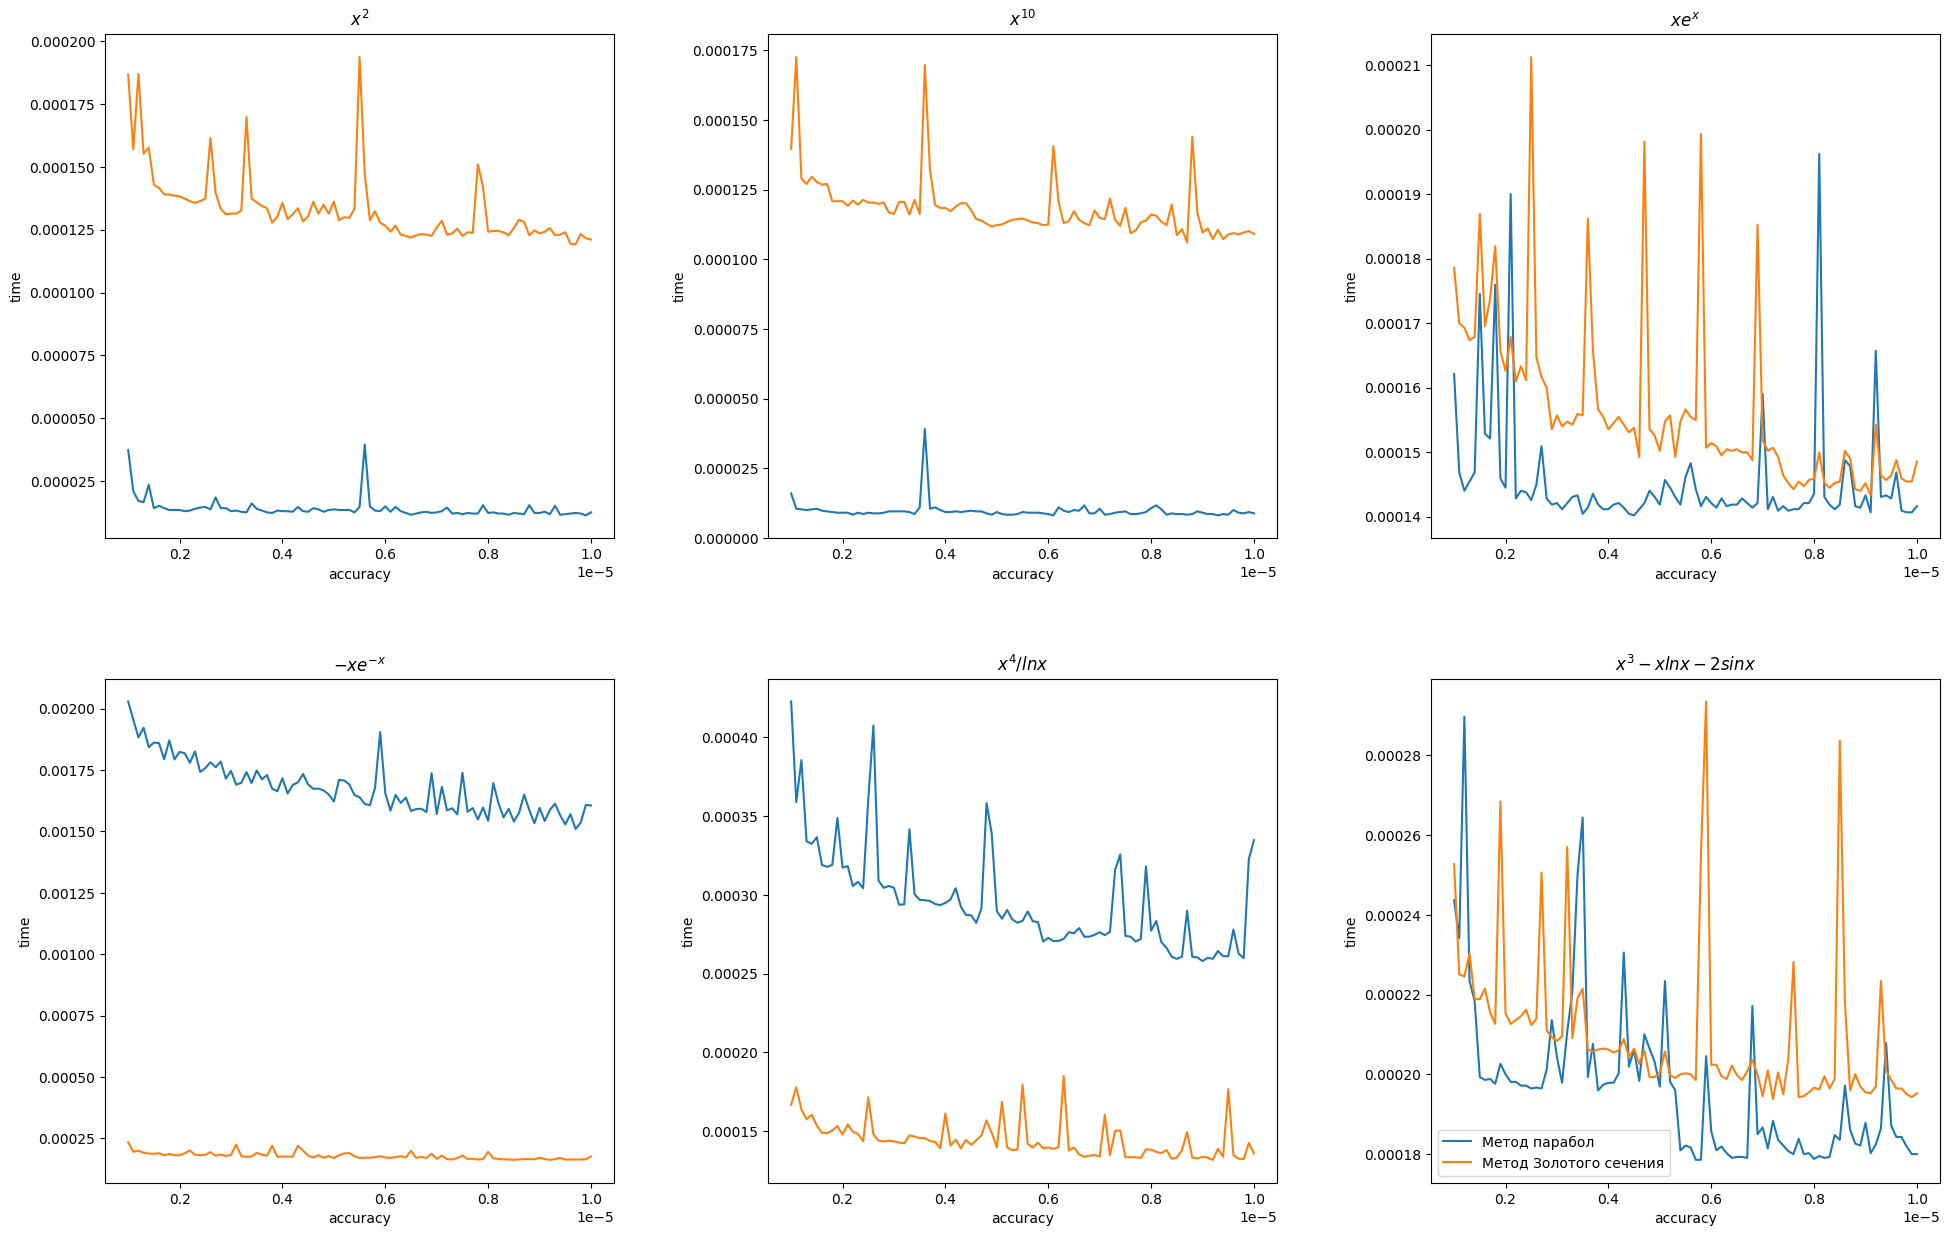

In [33]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(21, 14))  # figsize=(ширина, высота)
plt.tight_layout(pad=8.0)

left_border = 10**(-6)
right_border = 10**(-5)
step_len = 10**(-7)

Lst_x, Lst_par_y, Lst_gold_y = [], [], []

for i in range(number_of_func):
    Lst_par_y.append([])
    Lst_x.append([])
    Lst_gold_y.append([])
    for accuracy in np.linspace(left_border, right_border, num=91):
        Lst_x[i].append(accuracy)
        start_time = time.time()
        parabolas_search(function_list[i], interval_list[i][0], interval_list[i][1], accuracy)
        end_time = time.time()
        Lst_par_y[i].append(end_time - start_time)
        start_time = time.time()
        golden_section_search(function_list[i], interval_list[i][0], interval_list[i][1], accuracy)
        end_time = time.time()
        Lst_gold_y[i].append(end_time - start_time)


for i in range(2):
    for j in range(3):
        ind = i * 3 + j
        axs[i, j].plot(Lst_x[ind], Lst_par_y[ind], label='Метод парабол')
        axs[i, j].plot(Lst_x[ind], Lst_gold_y[ind], label='Метод Золотого сечения')
        axs[i, j].set_title(name_list[ind])
        axs[i, j].set_xlabel('accuracy')
        axs[i, j].set_ylabel('time')
        
plt.legend()
plt.show()

* Построим графики количество итераций от точности

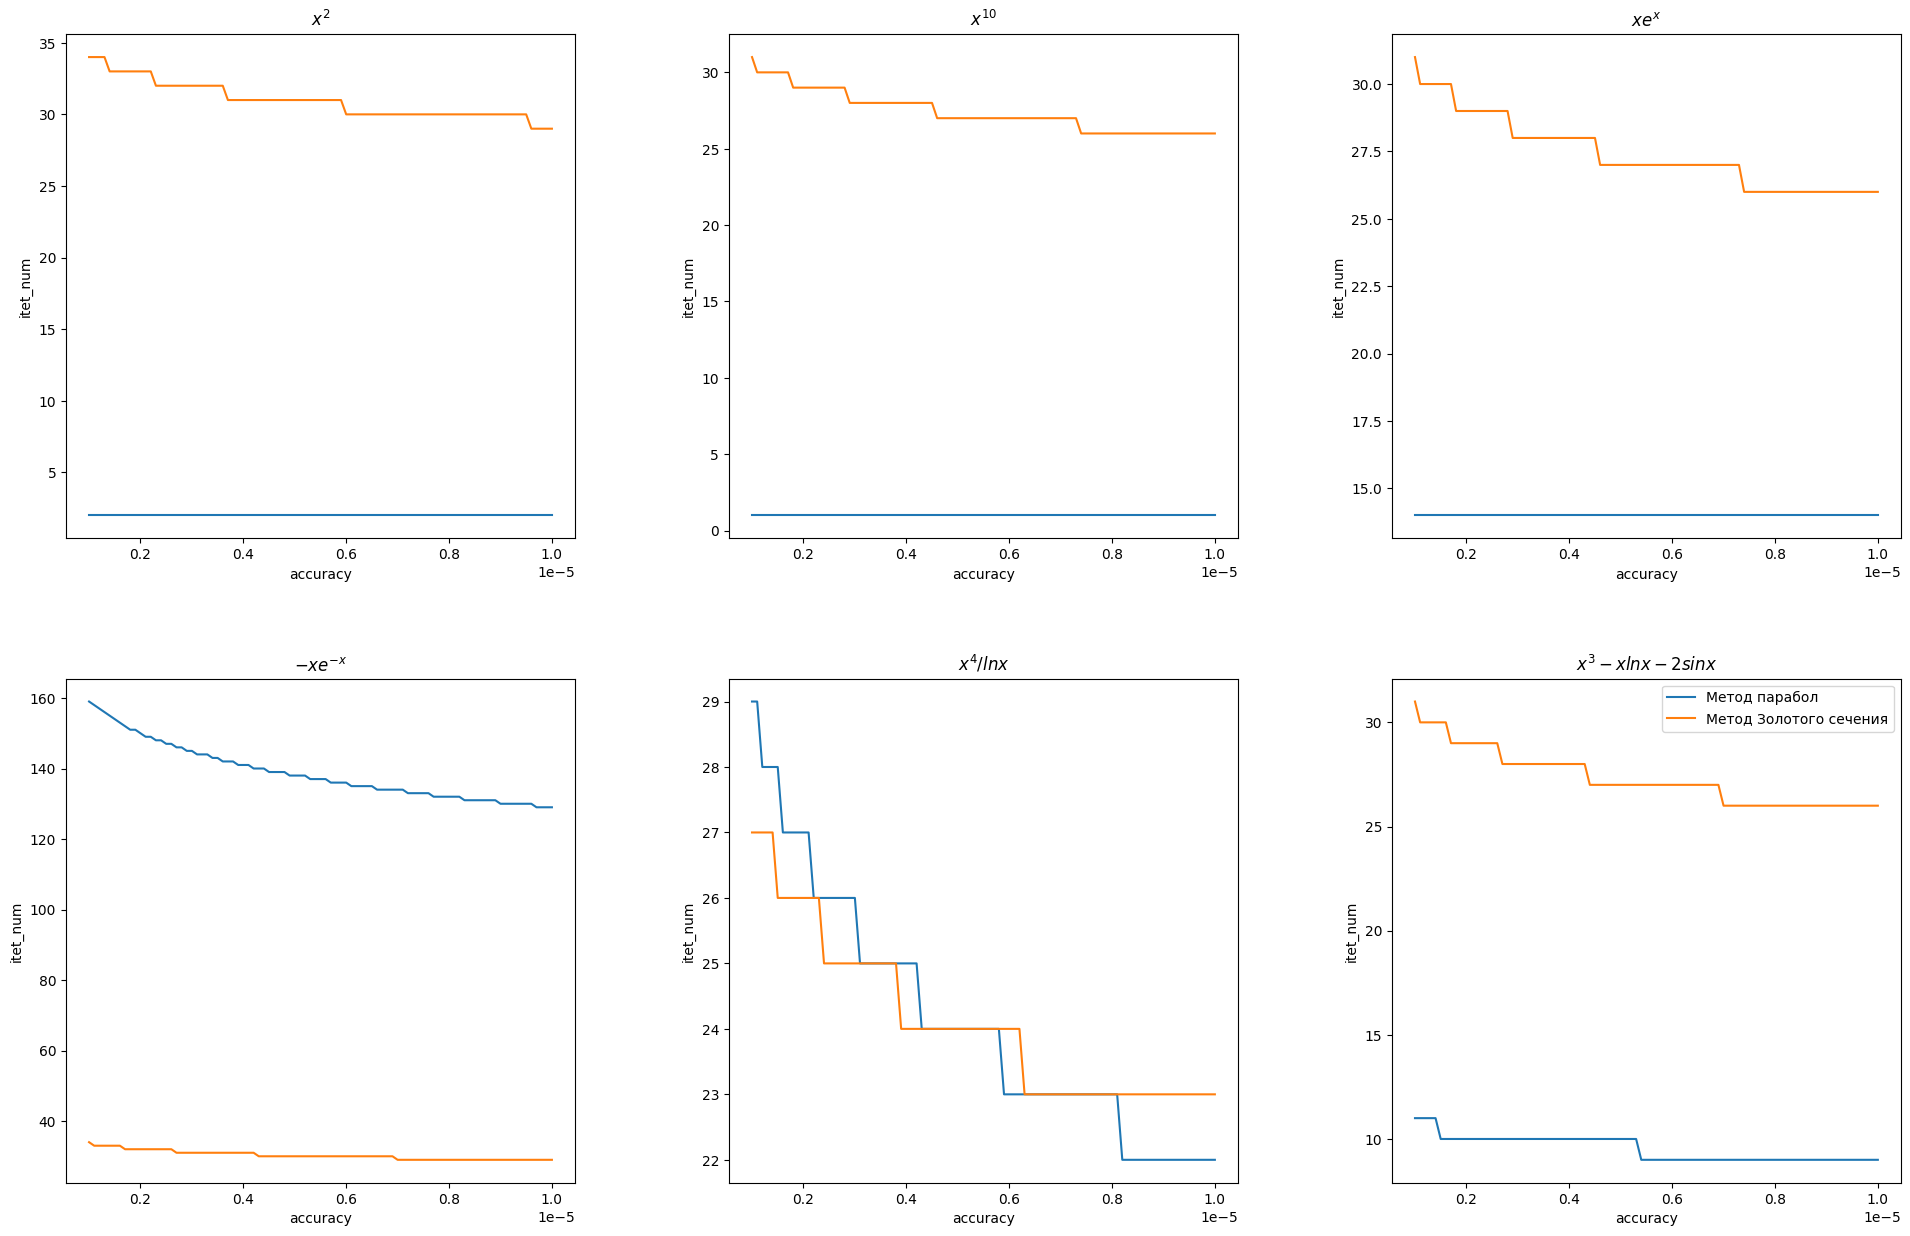

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(21, 14))  # figsize=(ширина, высота)
plt.tight_layout(pad=8.0)

left_border = 10**(-6)
right_border = 10**(-5)
step_len = 10**(-7)

Lst_x, Lst_par_y, Lst_gold_y = [], [], []

for i in range(number_of_func):
    Lst_par_y.append([])
    Lst_x.append([])
    Lst_gold_y.append([])
    
    for accuracy in np.linspace(left_border, right_border, num=91):
        Lst_x[i].append(accuracy)
        
        iter_num = parabolas_search(function_list[i], interval_list[i][0], interval_list[i][1], accuracy)[3]
        Lst_par_y[i].append(iter_num)
        
        iter_num = golden_section_search(function_list[i], interval_list[i][0], interval_list[i][1], accuracy)[3]
        Lst_gold_y[i].append(iter_num)


for i in range(2):
    for j in range(3):
        ind = i * 3 + j
        axs[i, j].plot(Lst_x[ind], Lst_par_y[ind], label='Метод парабол')
        axs[i, j].plot(Lst_x[ind], Lst_gold_y[ind], label='Метод Золотого сечения')
        axs[i, j].set_title(name_list[ind])
        axs[i, j].set_xlabel('accuracy')
        axs[i, j].set_ylabel('itet_num')

plt.legend()
plt.show()

* Построим гарфики сходимостей.

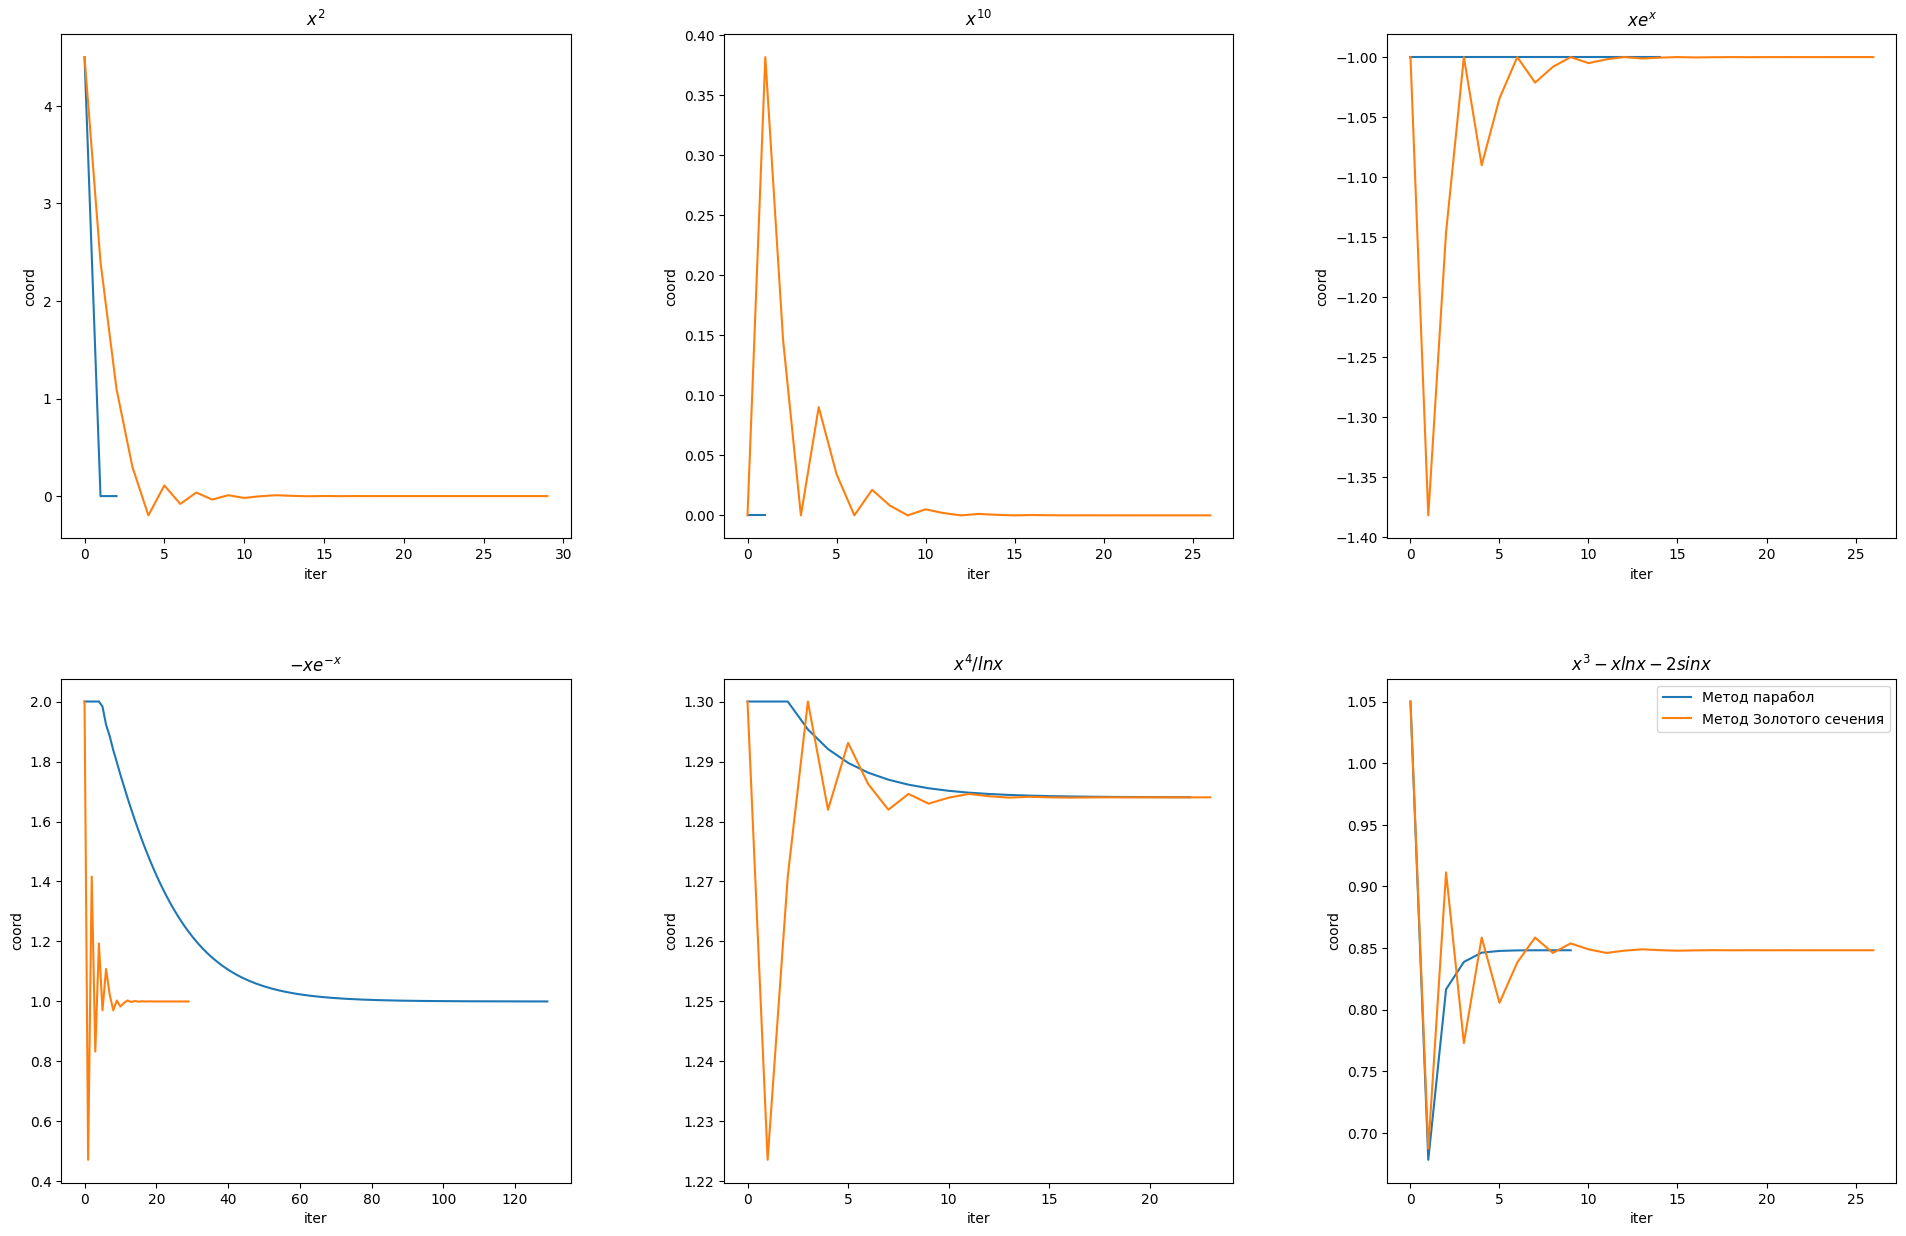

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(21, 14))  # figsize=(ширина, высота)
plt.tight_layout(pad=8.0)

Lst_par_x, Lst_gold_x, Lst_par_y, Lst_gold_y = [], [], [], []

for i in range(number_of_func):
    Lst_par_x.append(copy.deepcopy(parabolas_search(function_list[i], interval_list[i][0], interval_list[i][1], accuracy))[1])
    Lst_par_y.append(copy.deepcopy(parabolas_search(function_list[i], interval_list[i][0], interval_list[i][1], accuracy))[2])
    Lst_gold_x.append(copy.deepcopy(golden_section_search(function_list[i], interval_list[i][0], interval_list[i][1], accuracy))[1])
    Lst_gold_y.append(copy.deepcopy(golden_section_search(function_list[i], interval_list[i][0], interval_list[i][1], accuracy))[2])


for i in range(2):
    for j in range(3):
        ind = i * 3 + j
        axs[i, j].plot(Lst_par_x[ind], Lst_par_y[ind], label='Метод парабол')
        axs[i, j].plot(Lst_gold_x[ind], Lst_gold_y[ind], label='Метод Золотого сечения')
        axs[i, j].set_title(name_list[ind])
        axs[i, j].set_xlabel('iter')
        axs[i, j].set_ylabel('coord')

plt.legend()
plt.show()